In [3]:
import jax.numpy as jnp
import jax.random as jrandom
import numpy as np
from jax import grad


import scipy 

import matplotlib.pyplot as plt


from tqdm import tqdm
import time

from jax.config import config
config.update("jax_enable_x64", True)

from custom import create_S
from baseline import optimize_uncentered_S

import sys 
sys.path.append("../")
from Functions import PyCutestGetter


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
F_name, x_0, F = PyCutestGetter(0, eps=0, noise_type=None)


H = F.f2(x_0)

_, l_hist = create_S(H, sig, num_iter=50, x_init=None, coeff=coeff)
l_hist

453.52308956497865
518.1602250713821
413.9805735896716
308.25215082376286
251.36516500910133
176.4613951786618
138.3395713480194
93.11848635067588
75.89019391137545
61.213505825782086
49.898537207091366
40.15237664475114
32.80190100308629
26.31030253038856
16.843940808901394
11.481761286230787
9.140060239876615
5.938725744668504
3.9678345699497566
3.220716388394457
2.602871926199645
2.1135265264935374
1.7074032053602886
1.3869980095637957
1.119959369601694
0.9102503486686899
0.7345958817276669
0.597402109299743
0.48180459428459144
0.3921011010390721
0.31598382037649225
0.25737130600725067
0.20721651941435296
0.16895044735653833
0.13587588670416012
0.11091836221102472
0.08908614861027389


array([[6.38723444e+05, 2.37214327e-01],
       [4.12353973e+05, 8.36443186e-01],
       [2.24132796e+05, 1.50202012e+00],
       [1.39726001e+05, 2.08063912e+00],
       [6.32372622e+04, 2.73320508e+00],
       [4.07232233e+04, 3.38560724e+00],
       [1.76260769e+04, 4.07028413e+00],
       [1.21628067e+04, 4.78166294e+00],
       [7.65095982e+03, 5.50193119e+00],
       [5.23957836e+03, 6.20796919e+00],
       [3.29767027e+03, 6.91775799e+00],
       [2.26388787e+03, 7.65706325e+00],
       [1.41685088e+03, 8.37522936e+00],
       [6.00725069e+02, 9.11743903e+00],
       [2.68340450e+02, 9.87541509e+00],
       [1.78270723e+02, 1.06563232e+01],
       [7.17884113e+01, 1.14484212e+01],
       [3.45712249e+01, 1.22709770e+01],
       [2.13767447e+01, 1.31138451e+01],
       [1.51706998e+01, 1.39642711e+01],
       [9.49522962e+00, 1.49317632e+01],
       [6.81778475e+00, 1.59953341e+01],
       [4.37873020e+00, 1.70071151e+01],
       [3.22279625e+00, 1.80688882e+01],
       [2.175233

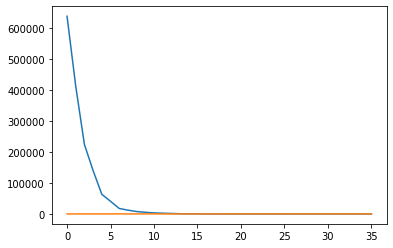

In [13]:
plt.plot(l_hist)

In [16]:
verbose = True

baseline_res = []
custom_res = []

test_problem_iter = range(5) # range(0, 1)

sig = 0.1
coeff = 0.1


for i in tqdm(test_problem_iter):
    F_name, x_0, F = PyCutestGetter(i, eps=0, noise_type=None)
    if verbose:
        print(F_name)
    if F is None:
        continue

    H = F.f2(x_0)

    baseline_res.append(optimize_uncentered_S(H, sig, coeff, max_steps=100, jrandom_key=None, x_curr=None)[1])
    custom_res.append(create_S(H, sig, num_iter=50, x_init=None, coeff=coeff)[1])

  0%|                                                                                | 0/5 [00:00<?, ?it/s]

AIRCRFTB
453.52308956497865


 20%|██████████████▍                                                         | 1/5 [00:48<03:12, 48.08s/it]

ALLINITU
0.4077517653474275


 40%|████████████████████████████▊                                           | 2/5 [00:59<01:19, 26.61s/it]

ARWHEAD
13.524823617682127


 60%|███████████████████████████████████████████▏                            | 3/5 [01:34<01:00, 30.47s/it]

BARD


 80%|█████████████████████████████████████████████████████████▌              | 4/5 [01:48<00:23, 23.69s/it]

31.929882468975265
BDQRTIC
438.7882725998156


100%|████████████████████████████████████████████████████████████████████████| 5/5 [02:39<00:00, 31.95s/it]


In [20]:
F_name, x_0, F = PyCutestGetter(0, eps=0, noise_type=None)

D, U = jnp.linalg.eig(F.f2(x_0))
print(repr(D))


DeviceArray([ 6.96867074e+03+0.j, -5.65090364e+03+0.j,
              3.30117392e+01+0.j,  8.67518225e+00+0.j,
             -3.02376833e+00+0.j], dtype=complex128)


/var/folders/c5/jntdg8g94vld91_h2df0psfc0000gn/T/ipykernel_32162/1591594182.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  custom_res = np.array(custom_res)


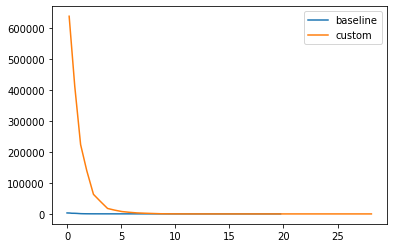

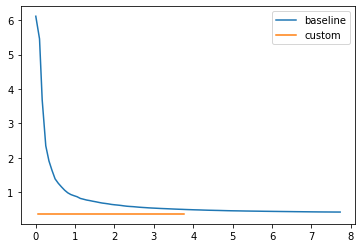

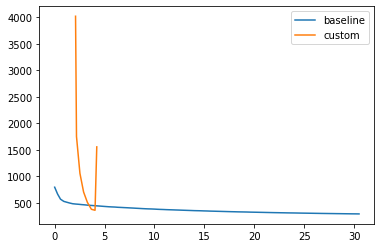

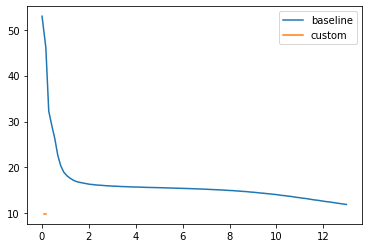

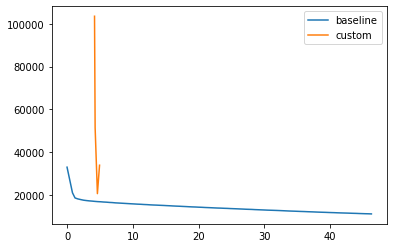

In [17]:
baseline_res = np.array(baseline_res)
custom_res = np.array(custom_res)

for i in range(5):
    
    plt.plot(baseline_res[i][:, 1], baseline_res[i][:, 0], label="baseline")
    plt.plot(custom_res[i][:, 1], custom_res[i][:, 0], label="custom")
    plt.legend()
    plt.show()

In [15]:
baseline_res

array([[DeviceArray([[-3.14717478e-03, -2.17119347e-03, -5.29836009e-02,
                      -2.94357914e-02, -9.38154666e-03],
                     [ 2.49287567e-03,  5.00231362e-04, -1.34068029e-02,
                       7.89972742e-02,  1.13856759e-01],
                     [ 3.54777665e-04, -2.92319492e-04, -7.33840940e-03,
                       6.60673264e-02, -1.41263496e-01],
                     [ 3.59761328e-04, -2.07764521e-02,  5.33768080e-04,
                       1.14219180e-04, -2.84419868e-04],
                     [-2.03727375e-02,  1.69057445e-03, -1.03154682e-03,
                       7.65018203e-03,  8.10391561e-03]], dtype=float64),
        array([[3.16607149e+03, 4.40096855e-03],
               [2.83054228e+03, 2.41580009e-01],
               [2.12026505e+03, 4.46536064e-01],
               [2.01135831e+03, 6.49379969e-01],
               [1.69427105e+03, 8.57604980e-01],
               [1.22382036e+03, 1.05861211e+00],
               [8.00380303e+02, 1.26653